<a href="https://colab.research.google.com/github/mmiqdam/GISportfolio/blob/main/Vector_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Geospatial Analysis : Vector Data**

*   Preparation data (Open data, Check Coordinat System, Reproject)
*   Operation data (Spatial join, Centroid, Buffer, Within)
*   Geoprocessing (Clip, Intersection, Union, Difference, Dissolve, Join Atribute)
*   Coloum Operation
*   Classification
*   Basic Statistic








In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Define the desired storage location
loc = '/content/drive/MyDrive/Geoacss/Phyton GIS/Data Simulasi/'

# Change to the previously defined storage location
os.chdir(loc)

# Check if the storage location is as defined
print('Working Directory: ',os.getcwd())

Mounted at /content/drive
Working Directory:  /content/drive/MyDrive/Geoacss/Phyton GIS/Data Simulasi


In [ ]:
# Import necessary libraries
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

!pip install contextily
import contextily as cx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 69.5 MB/s eta 0:00:00


# **Preparation data**

In [ ]:
# Read Shapefile
adm_jkt = gpd.read_file("Batas_Adm_Jakarta.shp") # polygon data as administrative boundaries
penjaringan_building = gpd.read_file("penjaringan_building.shp") # polygon data
penjaringan_road = gpd.read_file("penjaringan_road.shp") # line data
penjaringan_river = gpd.read_file("penjaringan_river.shp") # line data
supermarket = gpd.read_file("Supermarket.shp") # point data

In [ ]:
# check data crs
print(adm_jkt.crs)
print(penjaringan_building.crs)
print(penjaringan_road.crs)
print(penjaringan_river.crs)
print(supermarket.crs)

EPSG:32748
EPSG:4326
EPSG:4326
EPSG:4326
EPSG:4326


In [ ]:
# Reproject following adm_jkt because its projection is UTM
penjaringan_building = penjaringan_building.to_crs(adm_jkt.crs)
penjaringan_road = penjaringan_road.to_crs(adm_jkt.crs)
penjaringan_river = penjaringan_river.to_crs(adm_jkt.crs)
supermarket = supermarket.to_crs(adm_jkt.crs)

In [ ]:
# Read tabular data in csv format
jlh_sekolah_jkt = pd.read_csv("SEKOLAH_JKT.csv")

display(jlh_sekolah_jkt.head())

KDEPUM  JLH_SEKOLAH
0  3171011001          4.0
1  3171011002          5.0
2  3171011003         13.0
3  3171011004          5.0
4  3171011005          2.0

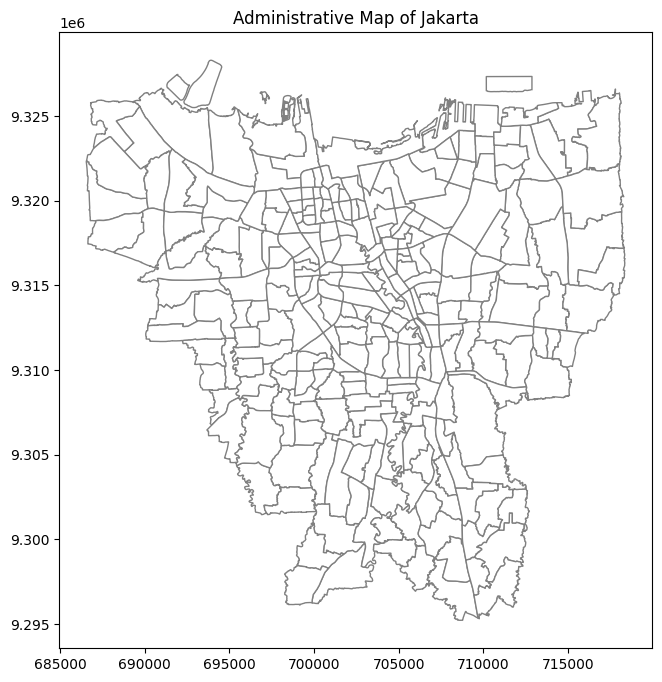

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# Plotting
adm_jkt.plot(ax=ax, edgecolor='grey', facecolor='white')
ax.set_title("Administrative Map of Jakarta")
plt.show()

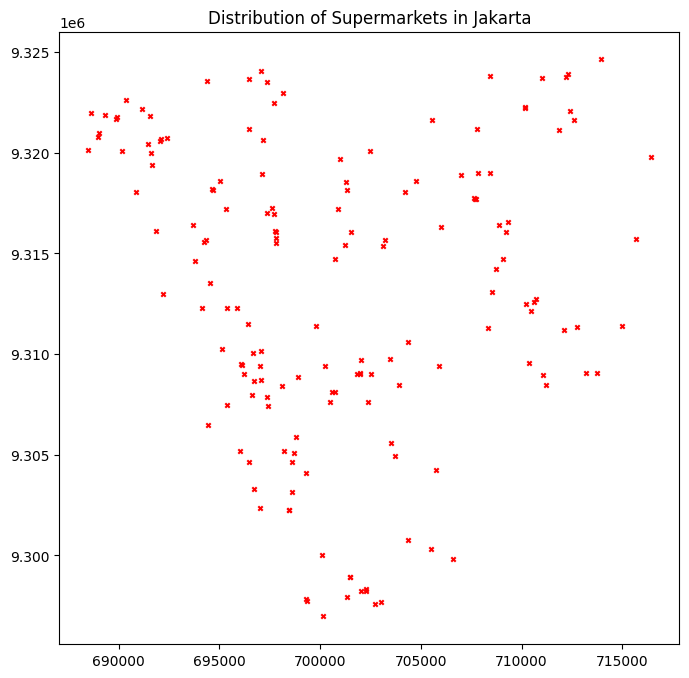

In [ ]:
# Display supermarket data
fig, ax = plt.subplots(figsize=(8, 8))

# Plotting
supermarket.plot(ax=ax, marker='x', color="red", markersize=10)
ax.set_title("Distribution of Supermarkets in Jakarta")
plt.show()

<Axes: >

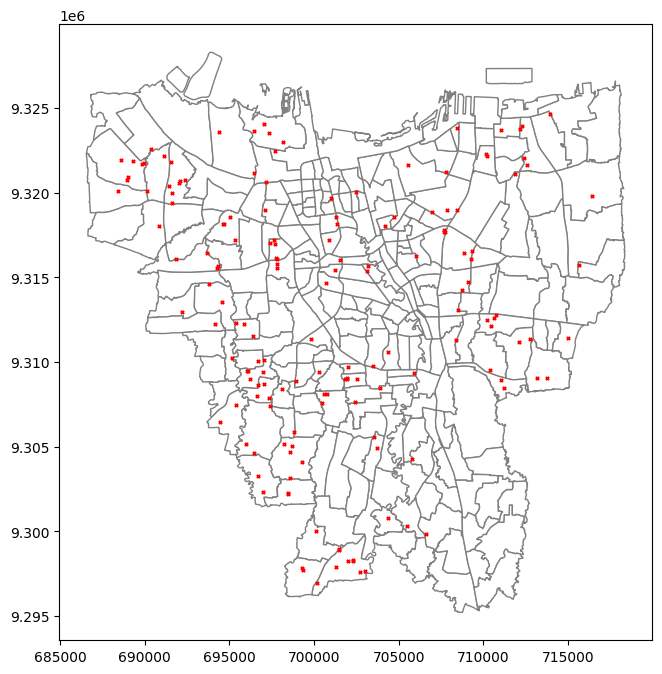

In [ ]:
# Display supermarkets and Jakarta

fig, ax = plt.subplots(figsize=(8, 8))

# Jakarta
adm_jkt.plot(ax=ax, edgecolor='grey', facecolor='white')

# Supermarket
supermarket.plot(ax=ax, marker='x', color="red", markersize=5)

# **Operation data**

Spatial join

In [ ]:
# Perform spatial join between buildings and administrative boundaries
join_result = gpd.sjoin(supermarket, adm_jkt, how="inner")

join_result.head()

WILAYAH KECAMATAN_left          KELURAHAN_left           X         Y  \
0  JAKARTA TIMUR    DUREN SAWIT           PONDOK KELAPA  106.926798 -6.247542   
1  JAKARTA TIMUR     JATINEGARA  CIPINANG BESAR SELATAN  106.883168 -6.227370   
2  JAKARTA PUSAT  CEMPAKA PUTIH     CEMPAKA PUTIH TIMUR  106.876669 -6.168824   
3  JAKARTA BARAT    KEBON JERUK            KEDOYA UTARA  106.758764 -6.165609   
4  JAKARTA PUSAT  CEMPAKA PUTIH     CEMPAKA PUTIH TIMUR  106.877199 -6.169531   

                                              LOKASI  \
0  Jalan Inspeksi Saluran Kalimalang 2 3 10, RT.3...   
1           Jl. Jend. Basuki Rachmat No.1, RT.4/RW.6   
2                              JL.JENDRAL AHMAD YANI   
3  Jl. Kedoya Akasia VIII Blok B9 No.16, RT.1/RW....   
4                              JL.JENDRAL AHMAD YANI   

                          NAMA_BANGU                        geometry  \
0           Giant Ekspres Kalimalang   POINT (713178.96 9309041.335)   
1             GIANT EKSPRES CIPINANG  POINT (708358.094 9311289.844)   
2  TRANSMART CARREFOUR CEMPAKA PUTIH  POINT (707661.607 9317767.697)   
3                HERO Pasar Swalayan  POINT (694611.955 9318167.733)   
4  TRANSMART CARREFOUR CEMPAKA PUTIH  POINT (707719.996 9317689.236)   

   index_right         KELURAHAN_right KECAMATAN_right           KOTA  \
0          100           PONDOK KELAPA     DUREN SAWIT  JAKARTA TIMUR   
1           76  CIPINANG BESAR SELATAN      JATINEGARA  JAKARTA TIMUR   
2          152     CEMPAKA PUTIH TIMUR   CEMPAKA PUTIH  JAKARTA PUSAT   
3          180            KEDOYA UTARA     KEBON JERUK  JAKARTA BARAT   
4          152     CEMPAKA PUTIH TIMUR   CEMPAKA PUTIH  JAKARTA PUSAT   

       KDEPUM  PENDUDUK  
0  3175071004     91843  
1  3175031007     44818  
2  3171051001     28611  
3  3173051006     56799  
4  3171051001     28611

<Axes: >

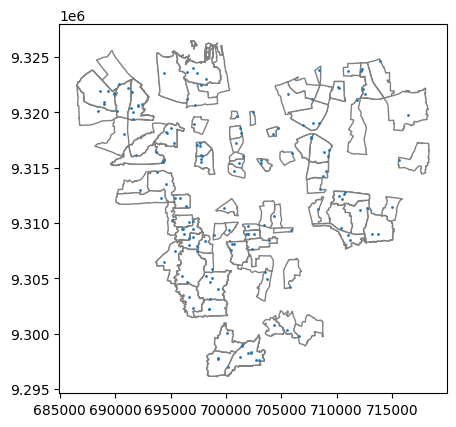

In [ ]:
# Display join result
join_result.head()

join_result_r = gpd.sjoin(adm_jkt, supermarket, how="inner")

fig, ax = plt.subplots(figsize=(5,5))
join_result_r.plot(ax=ax, facecolor='white', edgecolor='grey')
supermarket.plot(ax=ax, markersize=1)

HITUNG JUMLAH SUPERMARKET BERDASARKAN HASIL JOIN

In [ ]:
# We can count how many supermarkets are in each city
join_result.groupby('KOTA')['KOTA'].count().reset_index(name='Jumlah')

KOTA  Jumlah
0    JAKARTA BARAT      42
1    JAKARTA PUSAT      15
2  JAKARTA SELATAN      57
3    JAKARTA TIMUR      24
4    JAKARTA UTARA      24

CENTROID

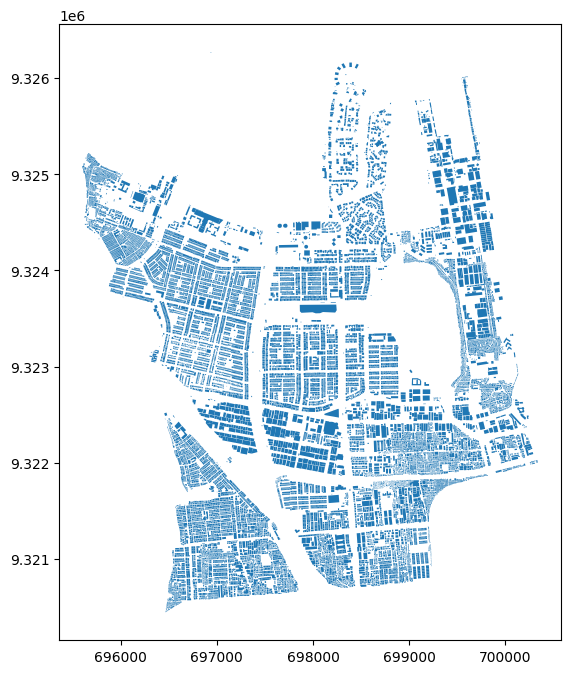

In [ ]:
fig, ax= plt.subplots(figsize=(8, 8))

penjaringan_building.plot(ax=ax)

plt.show()

In [ ]:
# Create Centroid for each feature
penjaringan_building_centroid = penjaringan_building.centroid
penjaringan_building_centroid.head()

0    POINT (699074.704 9322840.167)
1    POINT (700074.474 9322444.376)
2    POINT (698128.189 9321469.775)
3    POINT (700162.231 9322550.314)
4    POINT (697745.247 9324252.019)
dtype: geometry

In [ ]:
# CONVERT TO GEODATAFRAME

# Convert to GeoDataFrame
penj_building_point = gpd.GeoDataFrame(geometry=penjaringan_building.centroid)

# Join attributes from the original polygon to the centroid
penj_building_point = gpd.sjoin(penj_building_point, penjaringan_building, how='inner')

penj_building_point.head()

geometry  index_right     full_id     osm_id  \
1  POINT (700074.474 9322444.376)            1    r6762458    6762458   
2  POINT (698128.189 9321469.775)         1901  w527716895  527716895   
4  POINT (697745.247 9324252.019)            4   w29367653   29367653   
5  POINT (698040.081 9322062.919)            5  w120492180  120492180   
6  POINT (698090.857 9322117.421)            6  w120492200  120492200   

   osm_type    building  name amenity brand wheelchair  
1  relation         yes  None    None  None       None  
2       way        None  None    None  None       None  
4       way  industrial  None    None  None       None  
5       way         yes  None    None  None       None  
6       way         yes  None    None  None       None

<Axes: >

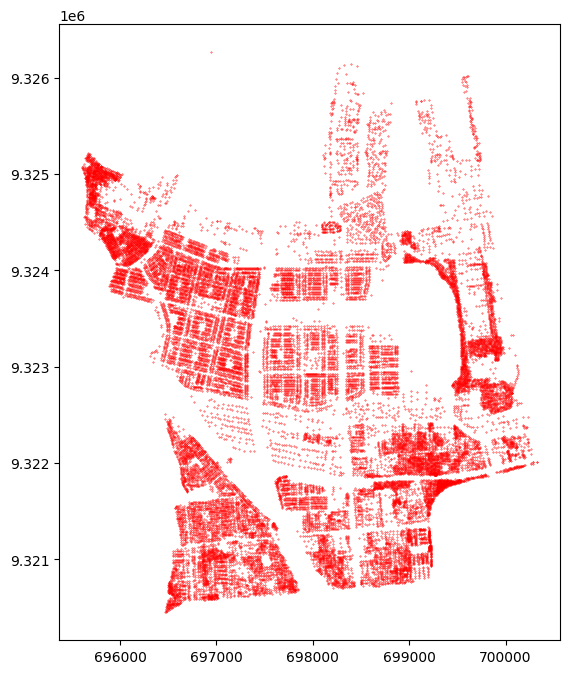

In [ ]:
# DISPLAY RESULT

fig, ax= plt.subplots(figsize=(8, 8))

penj_building_point.plot(ax=ax, marker='o', color='red', markersize=0.1)

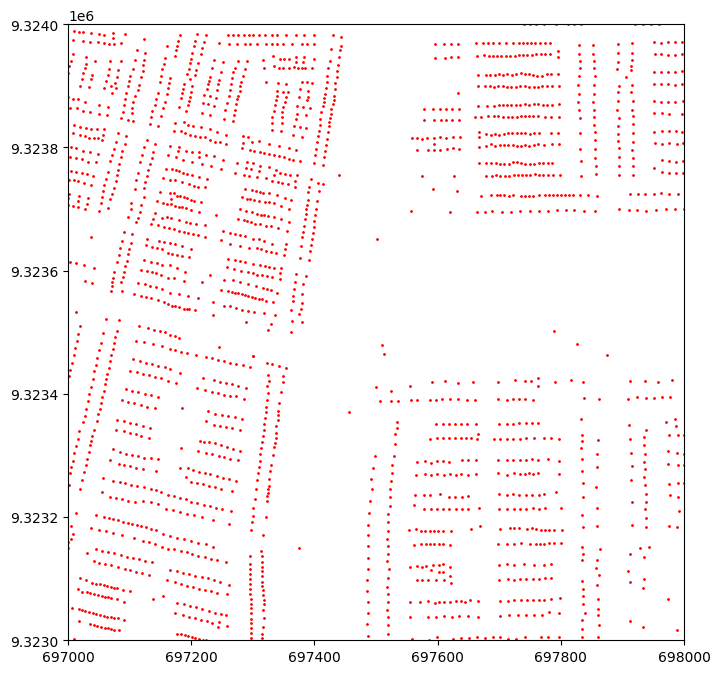

In [ ]:
# zoom to a specific area

fig, ax= plt.subplots(figsize=(8, 8))

penj_building_point.plot(ax=ax, marker='o', color='red', markersize=1)

ax.set_xlim(697000, 698000)
ax.set_ylim(9.323e6, 9.324e6)

plt.show()

BUFFER

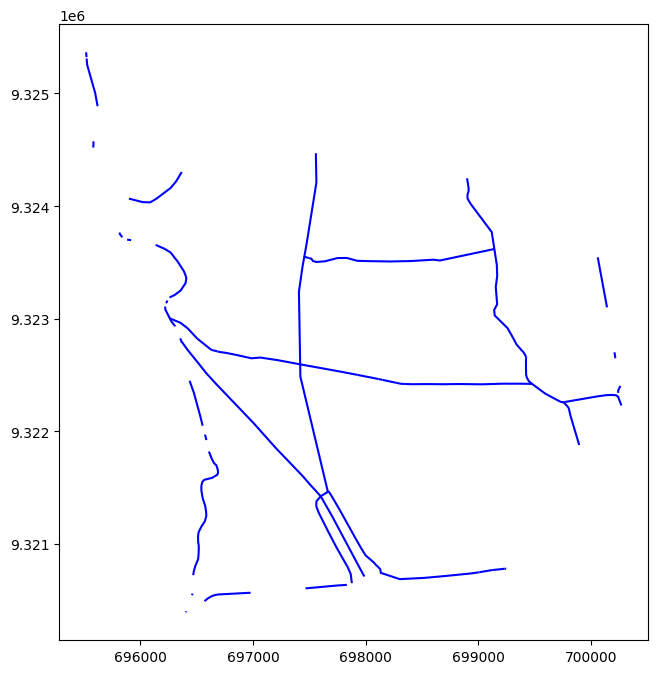

In [ ]:
fig, ax= plt.subplots(figsize=(8, 8))

# Plot river data
penjaringan_river.plot(ax=ax, edgecolor='blue')

# Display map
plt.show()

In [ ]:
# CALCULATE BUFFER

# Use Buffer Function and display
buffer_250 = gpd.GeoDataFrame(geometry=penjaringan_river.buffer(250))
buffer_250.head()

geometry
0  POLYGON ((699890.715 9323090.802, 699814.89 93...
1  POLYGON ((699573.873 9322088.153, 699562.913 9...
2  POLYGON ((697617.64 9320681.101, 697527.247 93...
3  POLYGON ((697386.513 9321552.451, 697177.472 9...
4  POLYGON ((697492.142 9321283.102, 697487.685 9...

In [ ]:
# Add new column and fill with description 'Buffer Sungai 250m'
buffer_250['keterangan'] = 'Buffer Sungai 250m'
buffer_250.head()

geometry          keterangan
0  POLYGON ((699890.715 9323090.802, 699814.89 93...  Buffer Sungai 250m
1  POLYGON ((699573.873 9322088.153, 699562.913 9...  Buffer Sungai 250m
2  POLYGON ((697617.64 9320681.101, 697527.247 93...  Buffer Sungai 250m
3  POLYGON ((697386.513 9321552.451, 697177.472 9...  Buffer Sungai 250m
4  POLYGON ((697492.142 9321283.102, 697487.685 9...  Buffer Sungai 250m

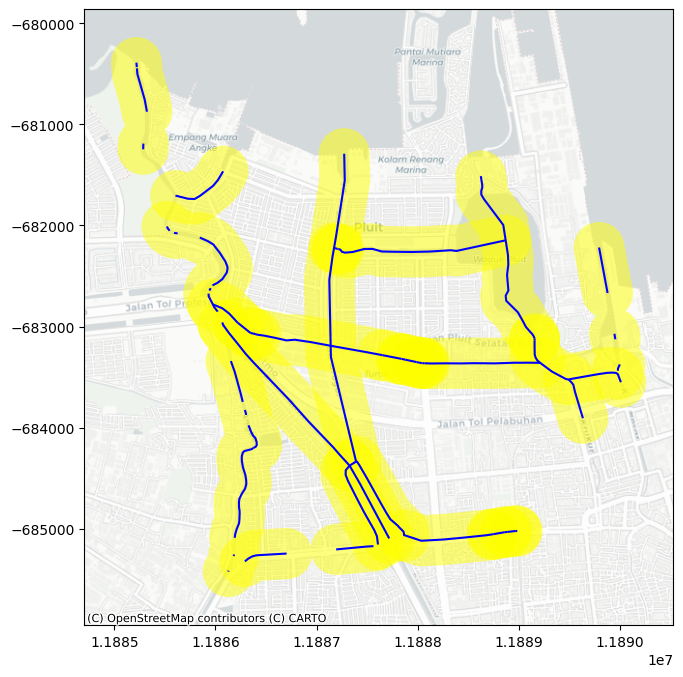

In [ ]:
# DISPLAY RESULT

fig, ax = plt.subplots(figsize=(8, 8))

# plot buffer result with transparent color
buffer_250.to_crs('EPSG:3857').plot(ax=ax, color='yellow', alpha=0.5)

# Plot river data
penjaringan_river.to_crs('EPSG:3857').plot(ax=ax, edgecolor='blue')

# Add basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

# Display
plt.show()

**Within**

"within" is a geometric operation used to check whether a spatial object (e.g., a point, line, or polygon) is within another spatial object.
This operation is often used to determine whether a geometry (such as a building) is within a specific administrative boundary or area. One important thing to note is that the object being checked must be a single, solid (undivided) polygon.
To do this, we use the .union_all() function.

<Axes: >

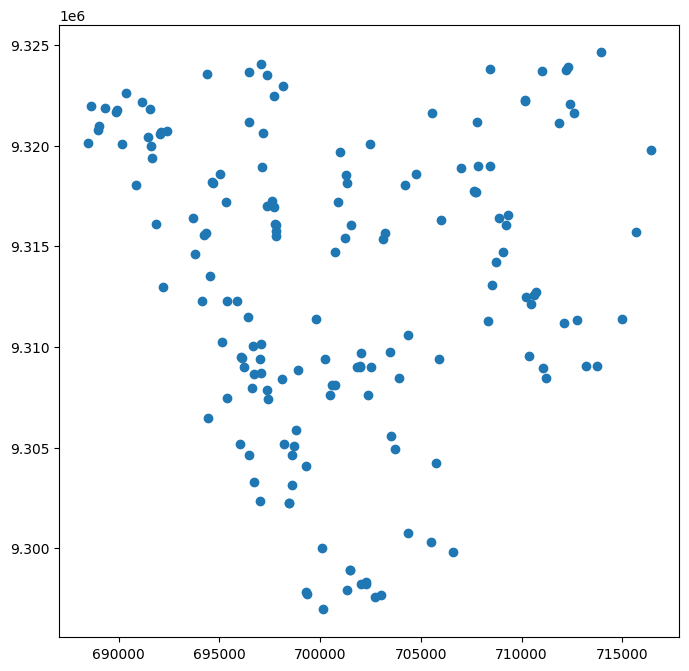

In [ ]:
supermarket.plot(figsize=(8,8))

<Axes: >

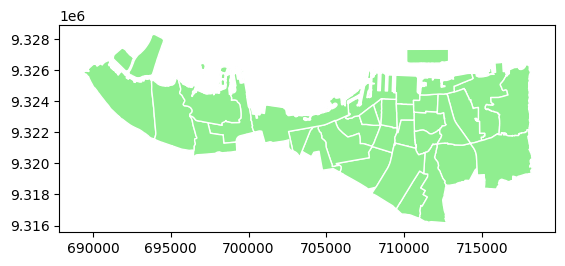

In [ ]:
# Let's try to extract North Jakarta City
jkt_utara = adm_jkt[adm_jkt['KOTA']=='JAKARTA UTARA']
jkt_utara.plot(color='lightgreen', edgecolor='white')

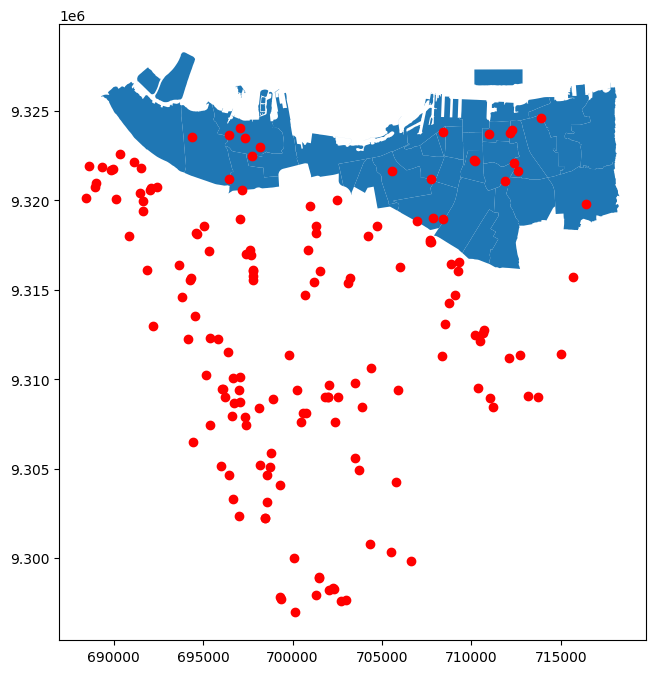

In [ ]:
#plot result
fig,ax= plt.subplots(figsize=(8, 8))
jkt_utara.plot(ax=ax)
supermarket.plot(ax=ax, color='red')

plt.show()

In [ ]:
# Try within operation
supermarket.within(jkt_utara.union_all())

0      False
1      False
2      False
3      False
4      False
       ...  
157     True
158    False
159     True
160    False
161    False
Length: 162, dtype: bool

In [ ]:
# Let's check the supermarkets included in the North Jakarta area
# Create a new column to store information whether the point is in North Jakarta or not
supermarket['JAKARTA UTARA'] = supermarket.within(jkt_utara.union_all())

# Display result
supermarket.head()

WILAYAH      KECAMATAN               KELURAHAN           X         Y  \
0  JAKARTA TIMUR    DUREN SAWIT           PONDOK KELAPA  106.926798 -6.247542   
1  JAKARTA TIMUR     JATINEGARA  CIPINANG BESAR SELATAN  106.883168 -6.227370   
2  JAKARTA PUSAT  CEMPAKA PUTIH     CEMPAKA PUTIH TIMUR  106.876669 -6.168824   
3  JAKARTA BARAT    KEBON JERUK            KEDOYA UTARA  106.758764 -6.165609   
4  JAKARTA PUSAT  CEMPAKA PUTIH     CEMPAKA PUTIH TIMUR  106.877199 -6.169531   

                                              LOKASI  \
0  Jalan Inspeksi Saluran Kalimalang 2 3 10, RT.3...   
1           Jl. Jend. Basuki Rachmat No.1, RT.4/RW.6   
2                              JL.JENDRAL AHMAD YANI   
3  Jl. Kedoya Akasia VIII Blok B9 No.16, RT.1/RW....   
4                              JL.JENDRAL AHMAD YANI   

                          NAMA_BANGU                        geometry  \
0           Giant Ekspres Kalimalang   POINT (713178.96 9309041.335)   
1             GIANT EKSPRES CIPINANG  POINT (708358.094 9311289.844)   
2  TRANSMART CARREFOUR CEMPAKA PUTIH  POINT (707661.607 9317767.697)   
3                HERO Pasar Swalayan  POINT (694611.955 9318167.733)   
4  TRANSMART CARREFOUR CEMPAKA PUTIH  POINT (707719.996 9317689.236)   

   JAKARTA UTARA  
0          False  
1          False  
2          False  
3          False  
4          False

In [ ]:
# Count the number of False and True values
supermarket['JAKARTA UTARA'].value_counts()

JAKARTA UTARA
False    138
True      24
Name: count, dtype: int64

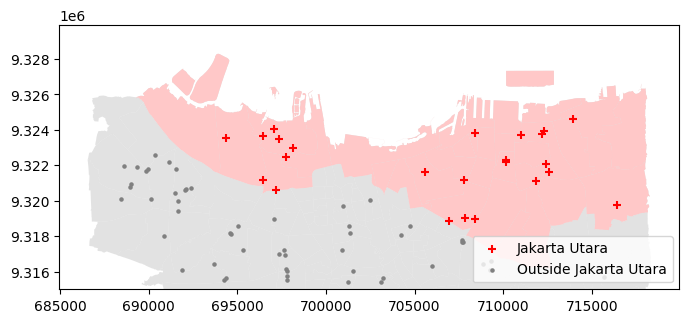

In [ ]:
# Visualize Results

fig, ax = plt.subplots(figsize=(8, 8))

# Plot Jakarta administrative data
adm_jkt.plot(ax=ax, edgecolor=None, facecolor='#c6c6c6', alpha=0.5)

# Highlight North Jakarta
adm_jkt[adm_jkt['KOTA'] == 'JAKARTA UTARA'].plot(ax=ax, edgecolor=None, facecolor='#ffc8c8')

# Plot supermarkets in North Jakarta
supermarket[supermarket['JAKARTA UTARA'] == True].plot(
    ax=ax, label='Jakarta Utara', color='red', marker='+')

# Plot supermarkets outside North Jakarta
supermarket[supermarket['JAKARTA UTARA'] == False].plot(
    ax=ax, label='Outside Jakarta Utara', color='grey', markersize=5)

# Display legend and y-axis limits
ax.legend(loc='lower right')
ax.set_ylim(9.315e6, None)

plt.show()

**GEOPROCESSING**

CLIP

<Axes: >

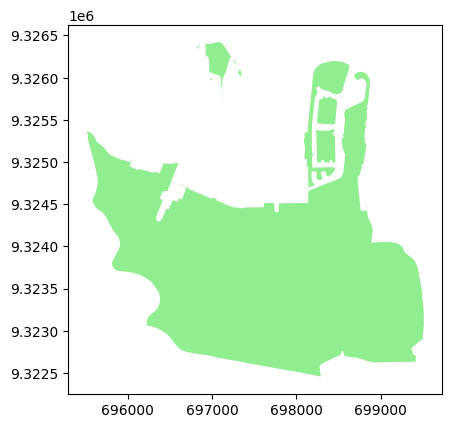

In [ ]:
# First, let's extract the Pluit urban village
pluit = adm_jkt[adm_jkt['KELURAHAN']=='PLUIT']
pluit.plot(color='lightgreen', edgecolor='white')

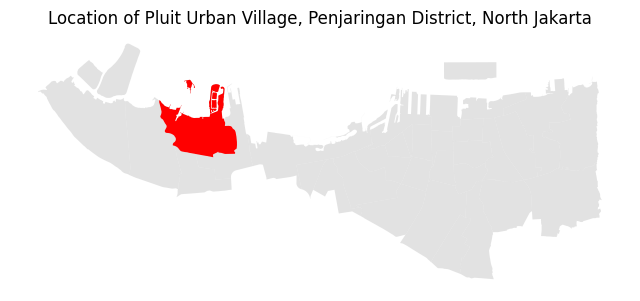

In [ ]:
# Let's try to display it on the North Jakarta map (multi-layer visualization)
fig, ax = plt.subplots(figsize=(8, 8))

# First layer is North Jakarta City Administration
adm_jkt[adm_jkt['KOTA']=='JAKARTA UTARA'].plot(ax=ax, edgecolor=None, facecolor='#c6c6c6', alpha=0.5)

# Second layer is Pluit urban village boundary
pluit.plot(ax=ax, facecolor='red')

ax.set_axis_off()
ax.set_title('Location of Pluit Urban Village, Penjaringan District, North Jakarta')

plt.show()

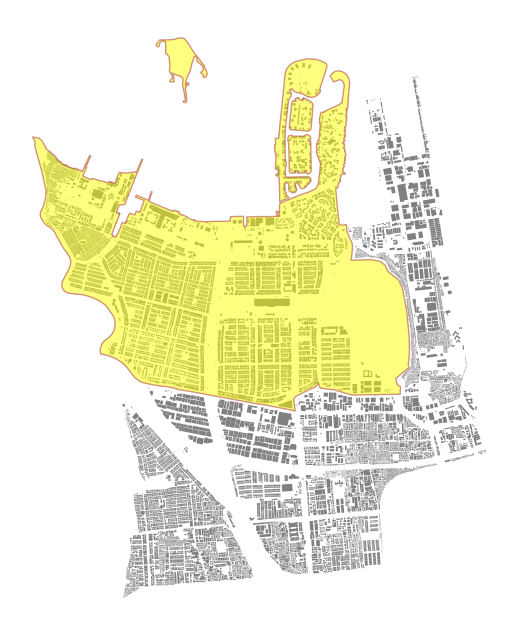

In [ ]:
# Let's check the position of the Pluit urban village boundary layer that intersects with Buildings
fig, ax = plt.subplots(figsize=(8, 8))

penjaringan_building.plot(ax=ax , color='grey')
pluit.plot(ax=ax, facecolor='yellow', edgecolor='brown', alpha=0.5)

ax.set_axis_off()

plt.show()

In [ ]:
# Now, let's perform the clipping operation
building_pluit = gpd.clip(penjaringan_building, pluit)
building_pluit.head()

full_id     osm_id osm_type building  name amenity brand wheelchair  \
6609  w528652149  528652149      way      yes  None    None  None       None   
6608  w528652146  528652146      way      yes  None    None  None       None   
6606  w528652141  528652141      way      yes  None    None  None       None   
6593  w528652106  528652106      way      yes  None    None  None       None   
6594  w528652109  528652109      way      yes  None    None  None       None   

                                               geometry  
6609  POLYGON ((697675.527 9322598.176, 697671.15 93...  
6608  POLYGON ((697652.444 9322580.757, 697645.85 93...  
6606  POLYGON ((697648.213 9322603.355, 697643.831 9...  
6593  POLYGON ((697594.343 9322618.719, 697590.1 932...  
6594  POLYGON ((697565.779 9322624.289, 697560.813 9...

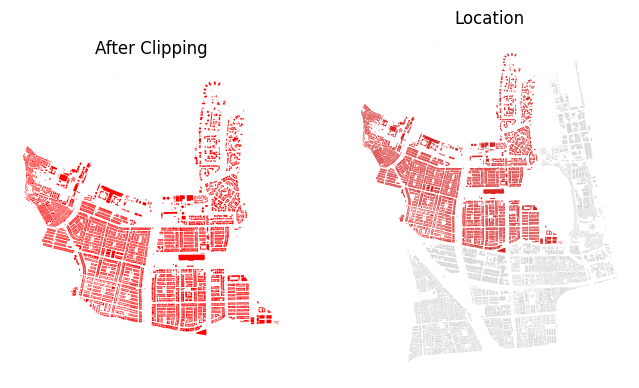

In [ ]:
# Let's try to display a comparison before and after clipping
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8, 8))

building_pluit.plot(ax=ax[0], facecolor='red', edgecolor=None)

building_pluit.plot(ax=ax[1], facecolor='red', edgecolor=None)
penjaringan_building.plot(ax=ax[1], facecolor='grey', edgecolor=None, alpha=0.30)

ax[0].set_title('After Clipping')
ax[1].set_title('Location')

ax[0].set_axis_off()
ax[1].set_axis_off()

plt.show()

INTERSECTION

In [ ]:
# Let's check the attributes of penjaringan_building and adm_jkt
penjaringan_building.head()

adm_jkt.head()

KELURAHAN  KECAMATAN             KOTA      KDEPUM  PENDUDUK  \
0       PENGADEGAN   PANCORAN  JAKARTA SELATAN  3174081005     26696   
1           CIKOKO   PANCORAN  JAKARTA SELATAN  3174081006     12904   
2        JAGAKARSA  JAGAKARSA  JAKARTA SELATAN  3174091001     79892   
3  SRENGSENG SAWAH  JAGAKARSA  JAKARTA SELATAN  3174091002     74061   
4         CIGANJUR  JAGAKARSA  JAKARTA SELATAN  3174091003     49709   

                                            geometry  
0  POLYGON ((705674.269 9309201.285, 705673.982 9...  
1  POLYGON ((706065.586 9309552.541, 706065.596 9...  
2  POLYGON ((700912.698 9302095.026, 700913.25 93...  
3  POLYGON ((702993.577 9299317.854, 702977.568 9...  
4  POLYGON ((699954.539 9300963.78, 699956.022 93...

In [ ]:
# Intersect adm_jkt that intersects with penjaringan_building
intersect_result = gpd.overlay(penjaringan_building, adm_jkt, how='intersection')
intersect_result.head()

full_id    osm_id  osm_type     building                           name  \
0   r2814102   2814102  relation   apartments               Apartemen Laguna   
1   r6762458   6762458  relation          yes                           None   
2   r7606838   7606838  relation       school  TK - SD - SMP - SMA Methodist   
3  r14171376  14171376  relation  marketplace                     Pasar Ikan   
4  w29367653  29367653       way   industrial                           None   

       amenity brand wheelchair    KELURAHAN    KECAMATAN           KOTA  \
0         None  None       None        PLUIT  PENJARINGAN  JAKARTA UTARA   
1         None  None       None  PENJARINGAN  PENJARINGAN  JAKARTA UTARA   
2       school  None       None    PEJAGALAN  PENJARINGAN  JAKARTA UTARA   
3  marketplace  None       None  PENJARINGAN  PENJARINGAN  JAKARTA UTARA   
4         None  None       None        PLUIT  PENJARINGAN  JAKARTA UTARA   

       KDEPUM  PENDUDUK                                           geometry  
0  3172011005     58646  POLYGON ((699087.599 9322879.908, 699120.311 9...  
1  3172011001    114084  POLYGON ((700067.971 9322460.899, 700033.892 9...  
2  3172011004     91313  POLYGON ((698111.642 9321486.451, 698141.505 9...  
3  3172011001    114084  POLYGON ((700132.762 9322578.634, 700145.781 9...  
4  3172011005     58646  POLYGON ((697844.913 9324267.459, 697845.432 9...

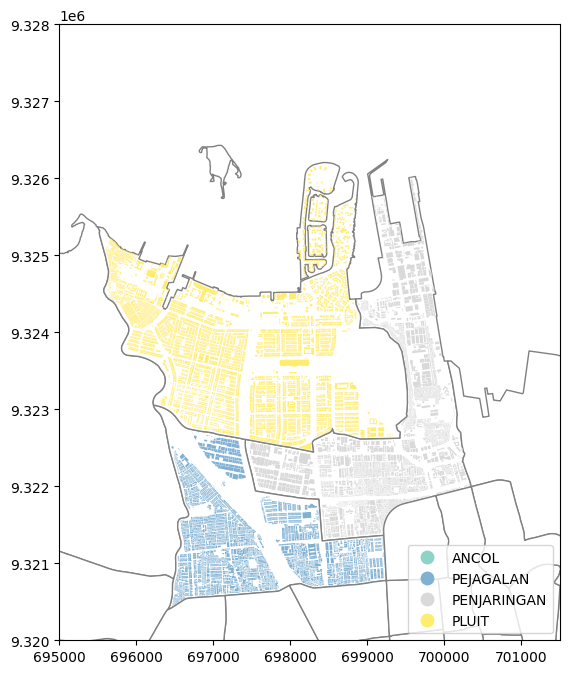

In [ ]:
# Display by Urban Village

fig, ax= plt.subplots(figsize=(8, 8))

adm_jkt.plot(ax=ax, facecolor='white', edgecolor='grey')
intersect_result.plot(ax=ax, column='KELURAHAN', cmap='Set3', legend=True, legend_kwds={'loc': 'lower right'})

ax.set_ylim(9.320e6, 9.328e6)
ax.set_xlim(695000, 701500)

# ax.set_axis_off()

plt.show()

UNION

Operasi union digunakan untuk menggabungkan dua dataset menjadi satu.
Setiap geometri dari kedua dataset akan digabungkan, sehingga menciptakan output yang berisi area dari kedua dataset tersebut.


<Axes: >

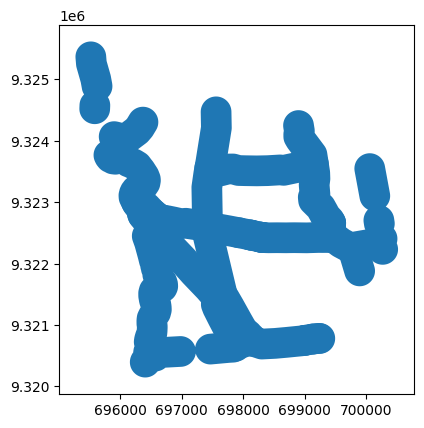

In [ ]:
# For example, we want to combine the buffer polygon with the administrative boundary polygon #
# For the buffer, we use buffer_250 from the practice above
buffer_250.plot()

In [ ]:
# For administrative boundaries, we select those that intersect with buildings
selected_adm = adm_jkt.copy()
selected_adm['building'] = selected_adm.intersects(penjaringan_building.union_all()) # .intersects() to check if there are features that intersect with another layer (output: True/ False)
selected_adm = selected_adm[selected_adm['building']==True]
selected_adm.head()

KELURAHAN    KECAMATAN           KOTA      KDEPUM  PENDUDUK  \
171  PENJARINGAN  PENJARINGAN  JAKARTA UTARA  3172011001    114084   
174    PEJAGALAN  PENJARINGAN  JAKARTA UTARA  3172011004     91313   
175        PLUIT  PENJARINGAN  JAKARTA UTARA  3172011005     58646   
204        ANCOL   PADEMANGAN  JAKARTA UTARA  3172051003     30368   

                                              geometry  building  
171  POLYGON ((699087.298 9325762.11, 699089.752 93...      True  
174  POLYGON ((697414.772 9322608.633, 697417.095 9...      True  
175  MULTIPOLYGON (((698880.356 9325964.211, 698882...      True  
204  POLYGON ((707230.521 9324675.229, 707223.949 9...      True

<Axes: >

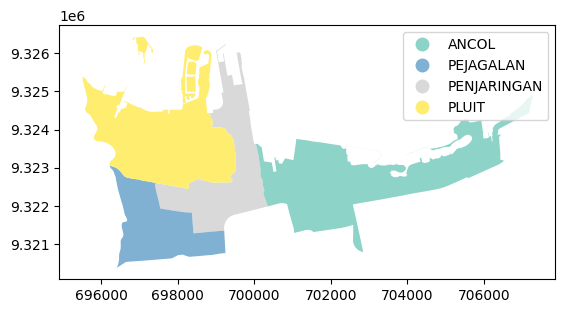

In [ ]:
selected_adm.plot(column='KELURAHAN', cmap='Set3', legend=True)

In [ ]:
# Perform the union process
union_result = gpd.overlay(selected_adm, buffer_250, how='union')
union_result.head()

KELURAHAN    KECAMATAN           KOTA      KDEPUM  PENDUDUK building  \
0  PENJARINGAN  PENJARINGAN  JAKARTA UTARA  3172011001  114084.0     True   
1  PENJARINGAN  PENJARINGAN  JAKARTA UTARA  3172011001  114084.0     True   
2  PENJARINGAN  PENJARINGAN  JAKARTA UTARA  3172011001  114084.0     True   
3  PENJARINGAN  PENJARINGAN  JAKARTA UTARA  3172011001  114084.0     True   
4  PENJARINGAN  PENJARINGAN  JAKARTA UTARA  3172011001  114084.0     True   

           keterangan                                           geometry  
0  Buffer Sungai 250m  POLYGON ((699972.739 9323739.694, 699977.312 9...  
1  Buffer Sungai 250m  POLYGON ((700083.514 9321926.831, 700072.426 9...  
2  Buffer Sungai 250m  POLYGON ((697818.681 9321894.184, 697749.03 93...  
3  Buffer Sungai 250m  POLYGON ((700224.758 9322569.803, 700225.245 9...  
4  Buffer Sungai 250m  MULTIPOLYGON (((699189.586 9322619.746, 699192...

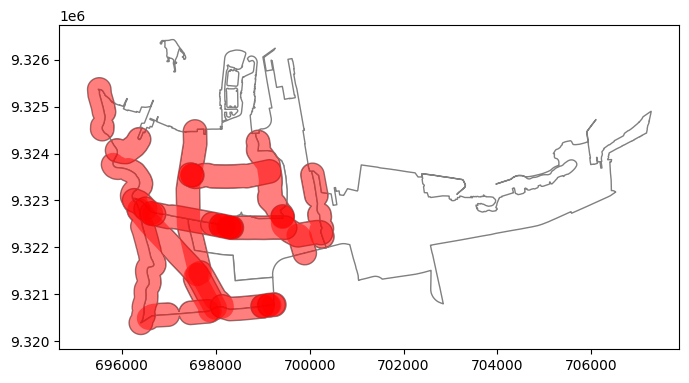

In [ ]:
# Display result
fig, ax = plt.subplots(figsize=(8, 8))

union_result.plot(ax=ax, facecolor='white', edgecolor='grey')
union_result[union_result['keterangan']=='Buffer Sungai 250m'].plot(ax=ax, color='r', alpha=0.5)

plt.show()

DIFFERENCE

Operasi difference digunakan untuk menghitung perbedaan geometri antara dua layer.
Untuk contoh, kita akan gunakan data sama seperti di atas, dalam hal ini kita akan
menghilkangkan bagian poligon administrasi yang bersinggungan dengan buffer sungai


In [ ]:
# Perform the difference process
difference_result = gpd.overlay(selected_adm, buffer_250, how='difference')
difference_result.head()

KELURAHAN    KECAMATAN           KOTA      KDEPUM  PENDUDUK  \
0  PENJARINGAN  PENJARINGAN  JAKARTA UTARA  3172011001    114084   
1    PEJAGALAN  PENJARINGAN  JAKARTA UTARA  3172011004     91313   
2        PLUIT  PENJARINGAN  JAKARTA UTARA  3172011005     58646   
3        ANCOL   PADEMANGAN  JAKARTA UTARA  3172051003     30368   

                                            geometry  building  
0  MULTIPOLYGON (((699199.736 9325989.19, 699202....      True  
1  MULTIPOLYGON (((698129.795 9321847.602, 698131...      True  
2  MULTIPOLYGON (((698859.431 9325723.373, 698859...      True  
3  POLYGON ((707222.663 9324635.224, 707219.091 9...      True

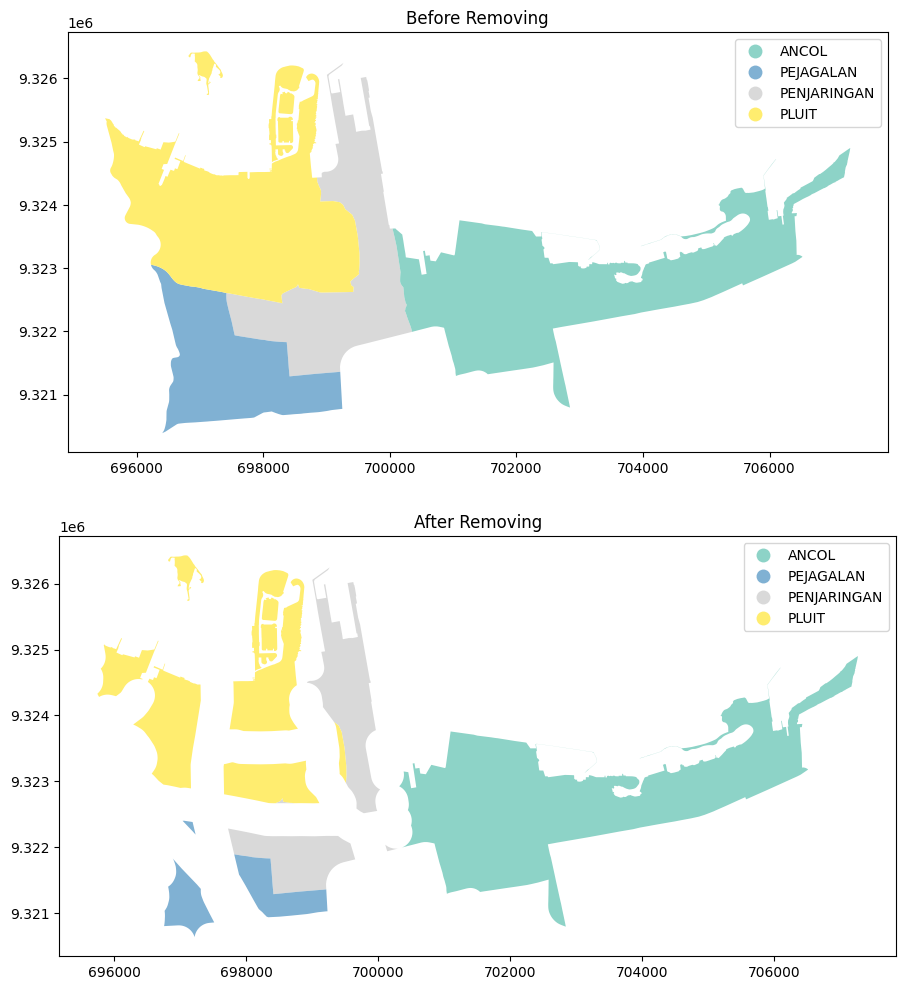

In [ ]:
# Display result
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))

selected_adm.plot(ax=ax[0], column='KELURAHAN', cmap='Set3', legend=True)
ax[0].set_title('Before Removing')

difference_result.plot(ax=ax[1], column='KELURAHAN', cmap='Set3', legend=True)
ax[1].set_title('After Removing')


plt.show()

DISSOLVE

Operasi dissolve digunakan untuk menggabungkan geometri berdasarkan atribut tertentu,

misalnya menggabungkan seluruh kelurahan menjadi kota berdasarkan kolom KOTA.


In [ ]:
adm_jkt.head(3)

# for example, merging all urban villages into a city based on the KOTA column.
adm_jkt.dissolve(by='KOTA', aggfunc='sum', as_index=False)

KOTA                                           geometry  \
0    JAKARTA BARAT  POLYGON ((694550.793 9311866.84, 694550.796 93...   
1    JAKARTA PUSAT  POLYGON ((700444.63 9312131.377, 700393.762 93...   
2  JAKARTA SELATAN  POLYGON ((699842.024 9296264.354, 699818.677 9...   
3    JAKARTA TIMUR  MULTIPOLYGON (((706689.139 9297372.957, 706676...   
4    JAKARTA UTARA  MULTIPOLYGON (((707682.67 9318358.104, 707682....   

                                           KELURAHAN  \
0  SUKABUMI SELATANKELAPA DUADURI KEPAKEDOYA UTAR...   
1  GAMBIRCIDENGPETOJO UTARADURI PULOPETOJO SELATA...   
2  PENGADEGANCIKOKOJAGAKARSASRENGSENG SAWAHCIGANJ...   
3  KEBON MANGGISUTAN KAYU SELATANPULO GADUNGPISAN...   
4  SUNTER JAYAPAPANGGOSUNGAI BAMBUKEBON BAWANGSUN...   

                                           KECAMATAN  \
0  KEBON JERUKKEBON JERUKKEBON JERUKKEBON JERUKKE...   
1  GAMBIRGAMBIRGAMBIRGAMBIRGAMBIRGAMBIRSAWAH BESA...   
2  PANCORANPANCORANJAGAKARSAJAGAKARSAJAGAKARSAJAG...   
3  MATRAMANMATRAMANPULO GADUNGPULO GADUNGMATRAMAN...   
4  TANJUNG PRIOKTANJUNG PRIOKTANJUNG PRIOKTANJUNG...   

                                              KDEPUM  PENDUDUK  
0  3173051003317305100431730510053173051006317305...   2589589  
1  3171011001317101100231710110033171011006317101...   1105731  
2  3174081005317408100631740910013174091002317409...   2384183  
3  3175011005317501100631750210013175021002317501...   3274716  
4  3172021002317202100331720210043172021005317202...   1865647

In [ ]:
# We will perform dissolve using Jakarta Administrative Boundaries
adm_jkt_dissolve = adm_jkt.dissolve(by='KOTA', aggfunc='sum', as_index=False)
adm_jkt_dissolve = adm_jkt_dissolve.drop(['KELURAHAN', 'KECAMATAN', 'KDEPUM'], axis=1)
adm_jkt_dissolve.head()

KOTA                                           geometry  \
0    JAKARTA BARAT  POLYGON ((694550.793 9311866.84, 694550.796 93...   
1    JAKARTA PUSAT  POLYGON ((700444.63 9312131.377, 700393.762 93...   
2  JAKARTA SELATAN  POLYGON ((699842.024 9296264.354, 699818.677 9...   
3    JAKARTA TIMUR  MULTIPOLYGON (((706689.139 9297372.957, 706676...   
4    JAKARTA UTARA  MULTIPOLYGON (((707682.67 9318358.104, 707682....   

   PENDUDUK  
0   2589589  
1   1105731  
2   2384183  
3   3274716  
4   1865647

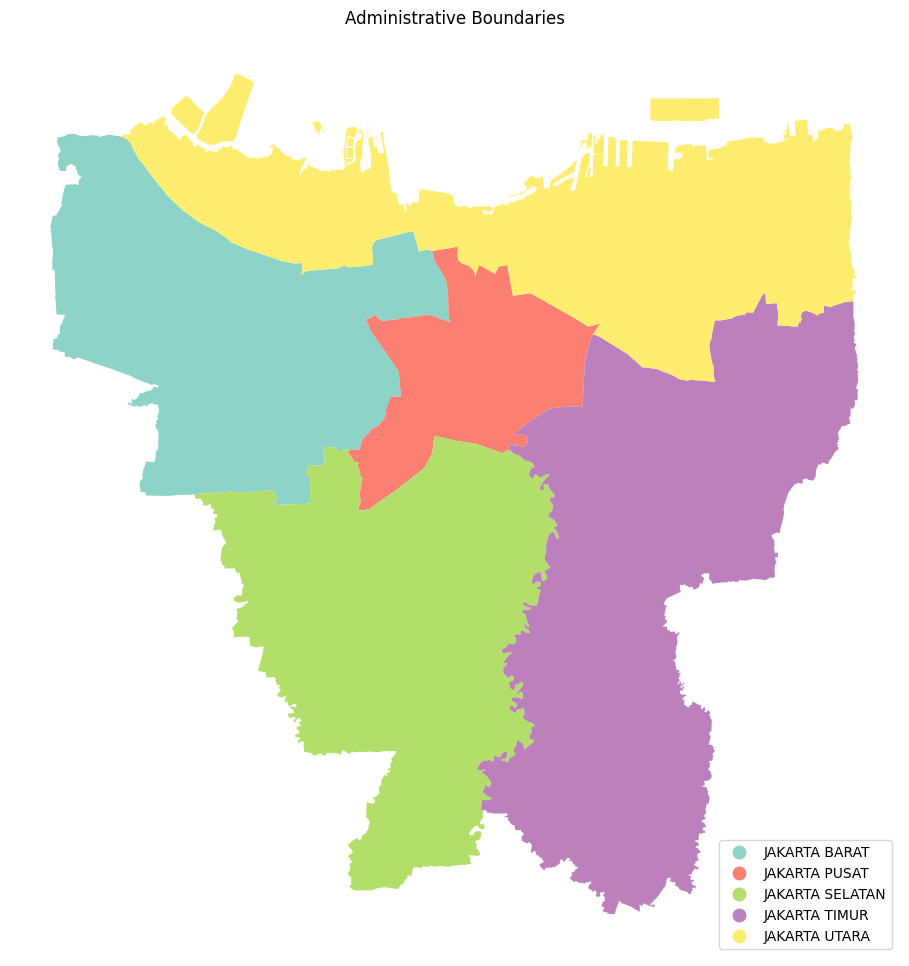

In [ ]:
# Display Result
fig, ax = plt.subplots(figsize=(12, 12))

adm_jkt_dissolve.plot(ax=ax,
                      column='KOTA',
                      cmap='Set3',
                      legend=True,
                      legend_kwds={'loc': 'lower right'})

ax.set_axis_off()
ax.set_title('Administrative Boundaries')
plt.show()

**JOIN ATRIBUTE**

Spatial data stored in a GeoDataFrame often needs to be merged with tabular data stored in other formats, such as a Pandas DataFrame or a CSV file. This merging is essential for adding attribute information to spatial objects, for example, adding population data to a spatial dataset of administrative areas.

Spatial data stored in a GeoDataFrame can be merged with tabular data stored in a DataFrame or CSV. This merging process is similar to a database join or a Pandas merge. For a successful merge, the spatial and tabular data must have the same key column, for example, the "ID" column, which is present in both datasets.

EXAMPLE: Merging data on the number of schools per sub-district in Jakarta (data source processed from OpenStreetMap, possibly incomplete) into a Jakarta Administrative Boundary shapefile with the key column being the sub-district ID ('KDEPUM').

In [ ]:
# Check adm_jkt attribute table
# Since we edited adm_jkt before, let's try to call the original data again
adm_jkt = gpd.read_file('Batas_Adm_Jakarta.shp')
adm_jkt.head()

KELURAHAN  KECAMATAN             KOTA      KDEPUM  PENDUDUK  \
0       PENGADEGAN   PANCORAN  JAKARTA SELATAN  3174081005     26696   
1           CIKOKO   PANCORAN  JAKARTA SELATAN  3174081006     12904   
2        JAGAKARSA  JAGAKARSA  JAKARTA SELATAN  3174091001     79892   
3  SRENGSENG SAWAH  JAGAKARSA  JAKARTA SELATAN  3174091002     74061   
4         CIGANJUR  JAGAKARSA  JAKARTA SELATAN  3174091003     49709   

                                            geometry  
0  POLYGON ((705674.269 9309201.285, 705673.982 9...  
1  POLYGON ((706065.586 9309552.541, 706065.596 9...  
2  POLYGON ((700912.698 9302095.026, 700913.25 93...  
3  POLYGON ((702993.577 9299317.854, 702977.568 9...  
4  POLYGON ((699954.539 9300963.78, 699956.022 93...

In [ ]:
# Check jlh_sekolah_jkt table
jlh_sekolah_jkt.head()

KDEPUM  JLH_SEKOLAH
0  3171011001          4.0
1  3171011002          5.0
2  3171011003         13.0
3  3171011004          5.0
4  3171011005          2.0

In [ ]:
# Merge Jakarta school count data using the .merge() function
adm_jkt_merge = adm_jkt.merge(jlh_sekolah_jkt, on='KDEPUM')
adm_jkt_merge.head( )

KELURAHAN  KECAMATAN             KOTA      KDEPUM  PENDUDUK  \
0       PENGADEGAN   PANCORAN  JAKARTA SELATAN  3174081005     26696   
1           CIKOKO   PANCORAN  JAKARTA SELATAN  3174081006     12904   
2        JAGAKARSA  JAGAKARSA  JAKARTA SELATAN  3174091001     79892   
3  SRENGSENG SAWAH  JAGAKARSA  JAKARTA SELATAN  3174091002     74061   
4         CIGANJUR  JAGAKARSA  JAKARTA SELATAN  3174091003     49709   

                                            geometry  JLH_SEKOLAH  
0  POLYGON ((705674.269 9309201.285, 705673.982 9...          7.0  
1  POLYGON ((706065.586 9309552.541, 706065.596 9...          7.0  
2  POLYGON ((700912.698 9302095.026, 700913.25 93...         27.0  
3  POLYGON ((702993.577 9299317.854, 702977.568 9...         29.0  
4  POLYGON ((699954.539 9300963.78, 699956.022 93...         13.0

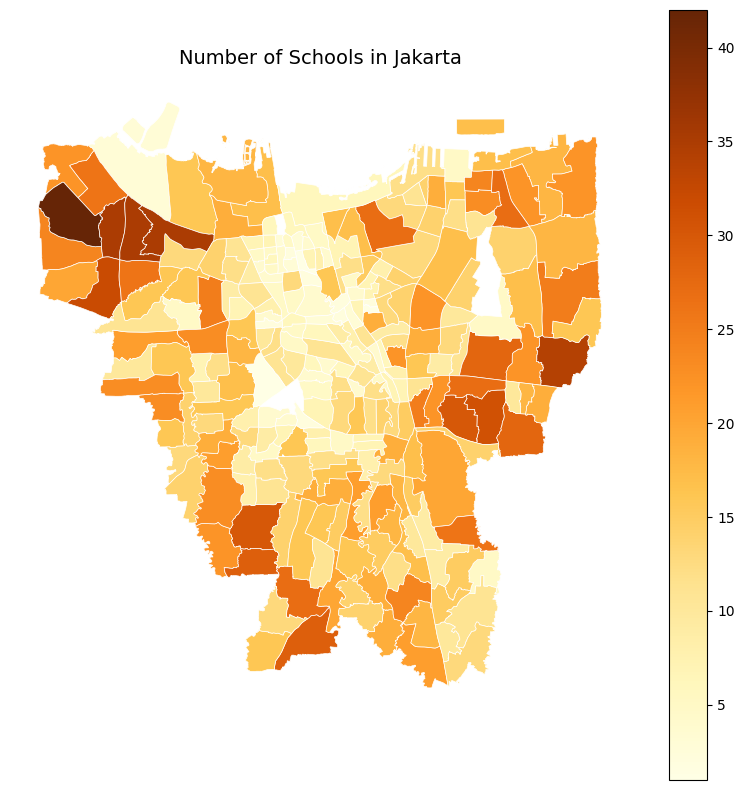

In [ ]:
# Display map
fig, ax = plt.subplots(figsize=(10,10))

adm_jkt_merge.plot(ax=ax, column='JLH_SEKOLAH', cmap='YlOrBr', edgecolor='white', linewidth=0.5, legend=True)

ax.set_axis_off()

ax.set_title('Number of Schools in Jakarta', fontsize=14)

plt.show()

**COLOM OPERATION**

Multi-column operations allow us to calculate quantitative data based on the value of a particular attribute, such as calculating population density based on the number of residents and the area, meaning there will be a mathematical calculation between the population and area columns.



In [ ]:
adm_jkt.head()

# Calculate population density (population per km2) for each urban village
adm_jkt["luas"] = adm_jkt.geometry.area / 1e6  # Convert to km2
adm_jkt["kepadatan_penduduk"] = adm_jkt["PENDUDUK"] / adm_jkt["luas"]

# Display result
adm_jkt.head()

KELURAHAN  KECAMATAN             KOTA      KDEPUM  PENDUDUK  \
0       PENGADEGAN   PANCORAN  JAKARTA SELATAN  3174081005     26696   
1           CIKOKO   PANCORAN  JAKARTA SELATAN  3174081006     12904   
2        JAGAKARSA  JAGAKARSA  JAKARTA SELATAN  3174091001     79892   
3  SRENGSENG SAWAH  JAGAKARSA  JAKARTA SELATAN  3174091002     74061   
4         CIGANJUR  JAGAKARSA  JAKARTA SELATAN  3174091003     49709   

                                            geometry      luas  \
0  POLYGON ((705674.269 9309201.285, 705673.982 9...  0.973666   
1  POLYGON ((706065.586 9309552.541, 706065.596 9...  0.665851   
2  POLYGON ((700912.698 9302095.026, 700913.25 93...  5.085596   
3  POLYGON ((702993.577 9299317.854, 702977.568 9...  5.553011   
4  POLYGON ((699954.539 9300963.78, 699956.022 93...  3.645991   

   kepadatan_penduduk  
0        27418.026955  
1        19379.712820  
2        15709.465296  
3        13337.088150  
4        13633.880536

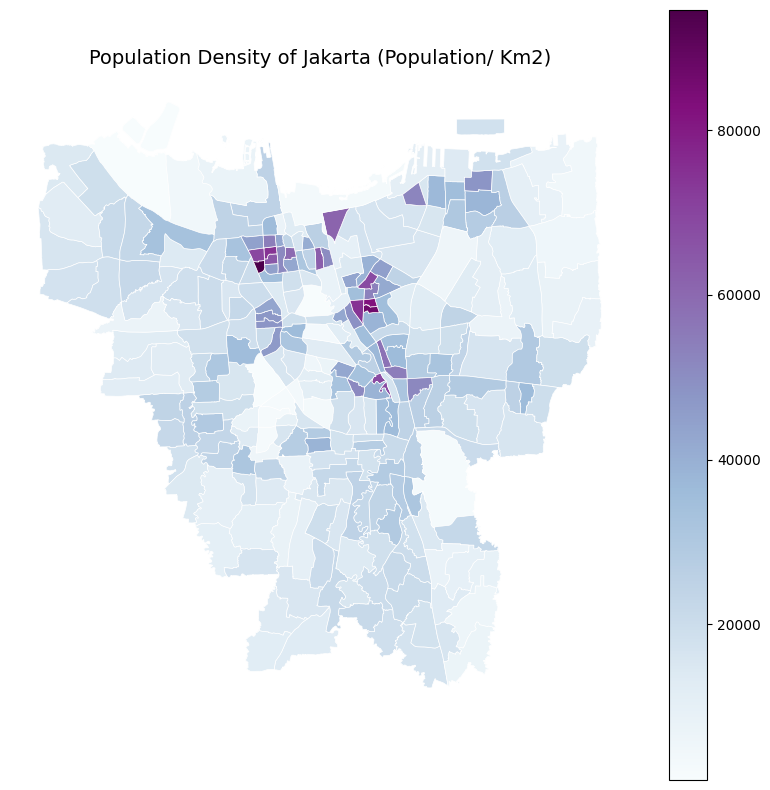

In [ ]:
# Display map
fig, ax = plt.subplots(figsize=(10,10))

adm_jkt.plot(ax=ax, column='kepadatan_penduduk', cmap='BuPu', edgecolor='white', linewidth=0.5, legend=True)

ax.set_axis_off()

ax.set_title('Population Density of Jakarta (Population/ Km2)', fontsize=14)

plt.show()

**CLASIFICATION**

Attribute value classification is used to divide spatial data into several categories based on numerical values.



In [ ]:
# Function to categorize population density
def klasifikasi_kepadatan(kepadatan):
    if kepadatan < 1000:
        return 'Low'
    elif 1000 <= kepadatan <= 5000:
        return 'Medium'
    elif 5000 < kepadatan <= 15000:
        return 'High'
    else:
        return 'Very High'

In [ ]:
# Apply classification function to the density column
adm_jkt['kategori_kepadatan'] = adm_jkt['kepadatan_penduduk'].apply(klasifikasi_kepadatan)
adm_jkt.head()

KELURAHAN  KECAMATAN             KOTA      KDEPUM  PENDUDUK  \
0       PENGADEGAN   PANCORAN  JAKARTA SELATAN  3174081005     26696   
1           CIKOKO   PANCORAN  JAKARTA SELATAN  3174081006     12904   
2        JAGAKARSA  JAGAKARSA  JAKARTA SELATAN  3174091001     79892   
3  SRENGSENG SAWAH  JAGAKARSA  JAKARTA SELATAN  3174091002     74061   
4         CIGANJUR  JAGAKARSA  JAKARTA SELATAN  3174091003     49709   

                                            geometry      luas  \
0  POLYGON ((705674.269 9309201.285, 705673.982 9...  0.973666   
1  POLYGON ((706065.586 9309552.541, 706065.596 9...  0.665851   
2  POLYGON ((700912.698 9302095.026, 700913.25 93...  5.085596   
3  POLYGON ((702993.577 9299317.854, 702977.568 9...  5.553011   
4  POLYGON ((699954.539 9300963.78, 699956.022 93...  3.645991   

   kepadatan_penduduk kategori_kepadatan  
0        27418.026955          Very High  
1        19379.712820          Very High  
2        15709.465296          Very High  
3        13337.088150               High  
4        13633.880536               High

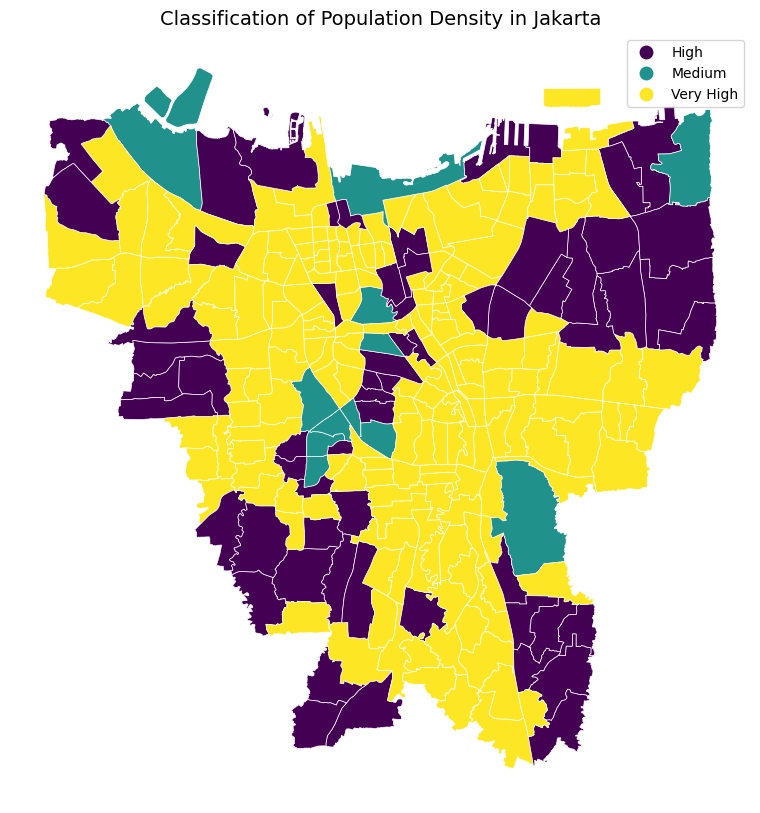

In [ ]:
# Display Map
fig, ax = plt.subplots(figsize=(10,10))

adm_jkt.plot(ax=ax, column='kategori_kepadatan', cmap='viridis', edgecolor='white', linewidth=0.5, legend=True)

ax.set_axis_off()

ax.set_title('Classification of Population Density in Jakarta', fontsize=14)

plt.show()

**BASIC STATISTIC**

In Geopandas, we can calculate descriptive statistics for spatial attributes, such as area, length,
and other numeric attributes. For example, we can calculate descriptive statistics for population density in the Jakarta area


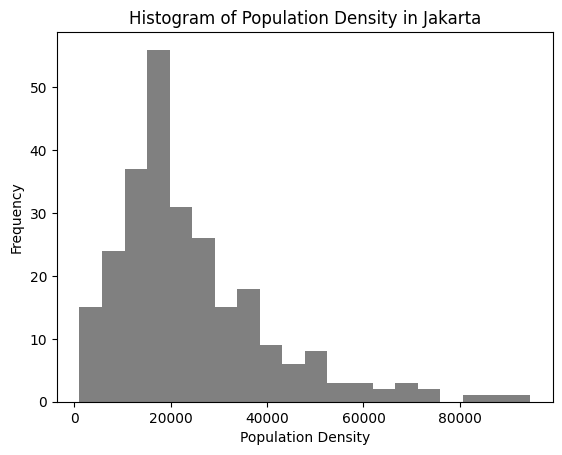

In [ ]:
adm_jkt.describe()

# We can also display data distribution using a histogram
adm_jkt['kepadatan_penduduk'].plot(kind='hist', bins=20, title='Histogram of Population Density in Jakarta', color='grey')
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.show()